# Importando bibliotecas

Matplotlib é uma biblioteca que é utilizada para a exibição de gráficos


Networkx é a biblioteca utilizada para a criação de grafos 

In [2]:
import matplotlib.pyplot as plt 
import networkx as nx

# Criando um grafo
Digite 'digraph' para criar um digrafo ou 'graph' para criar um grafo não dirigido

In [3]:
type = str(input())
if type.lower() == 'graph':
    G = nx.Graph()
elif type.lower() == 'digraph':
    G = nx.DiGraph()
else:
    print("Nenhuma opção foi escolhida")

graph


# Digite as arestas do grafo
## Automaticamente serão adicionados os vértices inseridos
OBS: Digite 'stop' para parar a inserção de dados

In [6]:
i = 0
while True:
    i = i + 1
    print("Aresta:" + str(i))
    print("Vértice 1")
    node1 = input()
    if(node1 == 'stop'):
        break
    print("Vértice 2")
    node2 = input()
    print("Peso da aresta")
    wt = float(input())
    G.add_edge(node1, node2, weight=wt)


Aresta:1
Vértice 1
5
Vértice 2
6
Peso da aresta
9
Aresta:2
Vértice 1
8
Vértice 2
4
Peso da aresta
6
Aresta:3
Vértice 1
8
Vértice 2
4
Peso da aresta
5
Aresta:4
Vértice 1
stop


# Exibição do Grafo

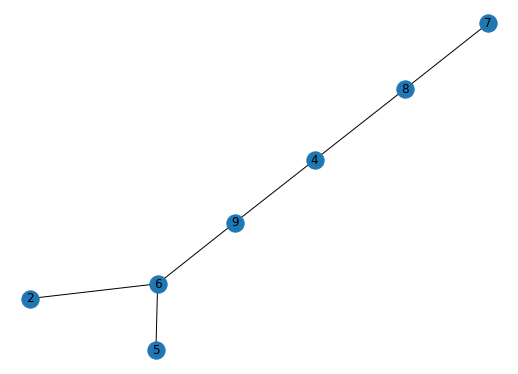

In [7]:
fig = plt.figure(figsize=(7,5))#Utilizado para definir o tamanho da exibição
nx.draw(G, with_labels=True, edge_color="black")
plt.show()

# Exibição do número de Vértices 

In [12]:
numV = len(list(G.nodes()))
print('Número de vertices: ',numV)

Número de vertices:  7


# Exibição do número de Arestas

In [14]:
numA = len(list(G.edges()))
print('Número de arestas: ',numA)

Número de arestas:  7


# Exibição do número de Componentes

In [15]:
numC = nx.number_connected_components(G.to_undirected())
print('Número de componentes: ',numC)

Número de componentes:  1


# Matriz de adjacência 

In [16]:
matrix = nx.adjacency_matrix(G)

In [18]:
print(matrix.todense())

[[2. 0. 4. 0. 0. 0. 0.]
 [0. 0. 9. 0. 0. 0. 0.]
 [4. 9. 0. 9. 0. 0. 0.]
 [0. 0. 9. 0. 8. 0. 0.]
 [0. 0. 0. 8. 0. 5. 0.]
 [0. 0. 0. 0. 5. 0. 4.]
 [0. 0. 0. 0. 0. 4. 0.]]


# Pajek
## Código para geração de arquivo apartir do grafo acima (pode ser lido pelo pajek) 

In [27]:
nx.write_pajek(G, "Grafo.net")